In [1]:
import torch

from plot_domination import plot_pareto_domination, plot_scalarized_domination
from scalarize.utils.scalarization_functions import (
    AugmentedChebyshevScalarization,
    ChebyshevScalarization,
    LinearScalarization,
    LpScalarization,
)

import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
tkwargs = {"dtype": torch.double, "device": "cpu"}

N = 200
X = torch.linspace(-0.05, 1.05, N, **tkwargs)
Y = torch.linspace(-0.05, 1.05, N, **tkwargs)
A, B = torch.meshgrid(X, Y, indexing="xy")

# (N*N x 2)-dim array
Z = torch.column_stack([A.reshape(N * N, 1), B.reshape(N * N, 1)])

r = torch.tensor([[0.3, 0.2]], **tkwargs)
utopia = torch.tensor([[0.6, 0.75]], **tkwargs)
nadir = torch.tensor([[0, 0]], **tkwargs)
w = torch.tensor([[0.55, 0.45]], **tkwargs)
h = w / torch.pow(torch.sum(torch.pow(w, 2)), 1 / 2)

utopia_set = torch.tensor(
    [
        [0.5, 0.8],
        [0.6, 0.75],
        [0.7, 0.7],
        [0.75, 0.6],
        [0.8, 0.5],
    ],
    **tkwargs
)

In [3]:
s_fn_dict = {
    "Linear": [LinearScalarization(weights=w), None, None, None],
    r"$L^2$-norm": [
        LpScalarization(p=2, weights=w, ref_points=utopia),
        utopia,
        None,
        None,
    ],
    "Chebyshev": [
        ChebyshevScalarization(weights=w, ref_points=utopia),
        utopia,
        None,
        None,
    ],
    "Augmented Chebyshev": [
        AugmentedChebyshevScalarization(weights=w, ref_points=utopia, beta=0.05),
        utopia,
        None,
        None,
    ],
}

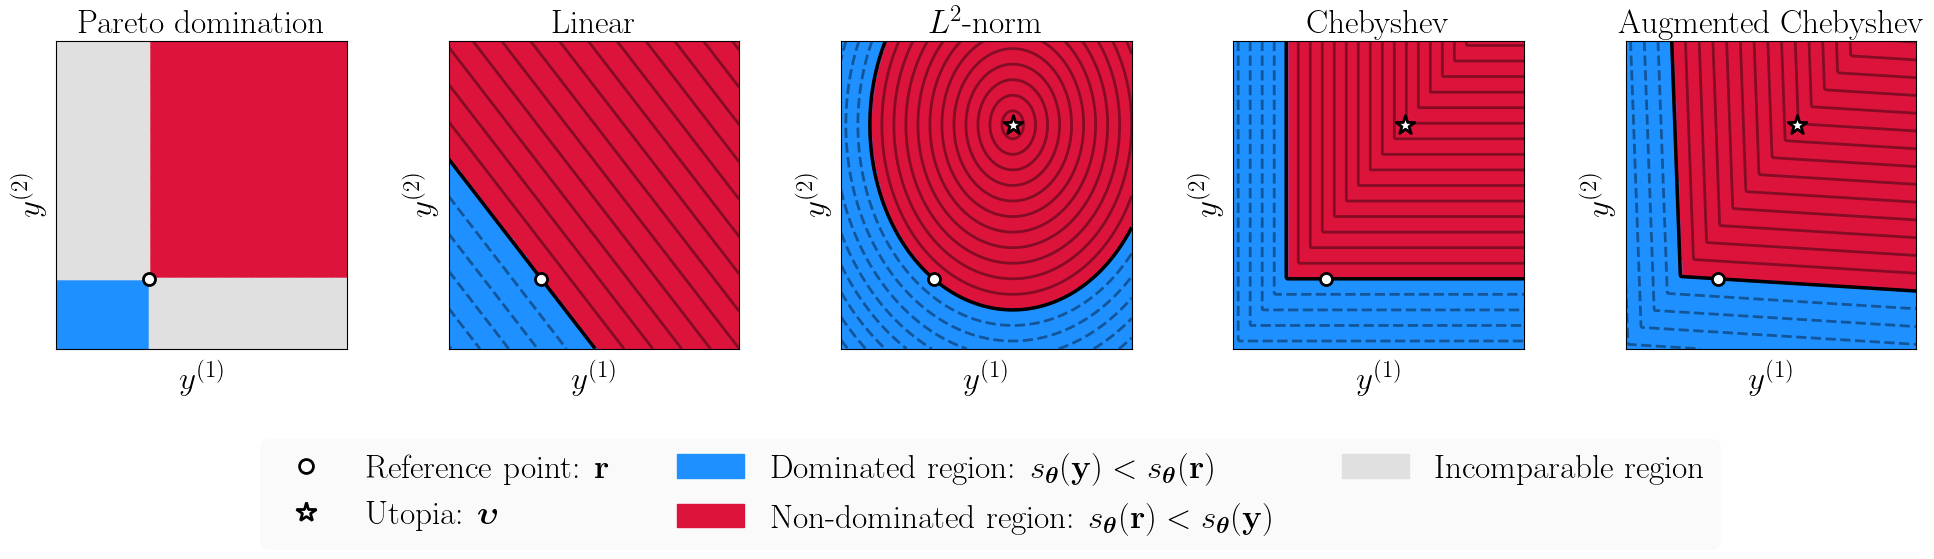

In [4]:
num_rows = 1
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 4))
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.35
)

plt.subplot(num_rows, num_cols, 1)
plot_pareto_domination(Z, r, "Pareto domination", fontsize=24)

j = 1
for key, value in s_fn_dict.items():
    plt.subplot(num_rows, num_cols, j + 1)
    s_fn = value[0]
    Zr = s_fn(r)[..., 0]
    ZY = s_fn(Z)[..., 0]
    plot_scalarized_domination(
        Z,
        ZY,
        Zr,
        r,
        utopia_set=value[1],
        nadir_set=value[2],
        unit_vector=value[3],
        title=key,
        contours=True,
        X=X,
        Y=Y,
        fontsize=24,
    )
    j = j + 1

red_patch = mpatches.Patch(
    color="crimson",
    label=r"Non-dominated region: $s_{\boldsymbol{\theta}}(\mathbf{r}) < s_{\boldsymbol{\theta}}(\mathbf{y})$",
)
blue_patch = mpatches.Patch(
    color="dodgerblue",
    label=r"Dominated region: $s_{\boldsymbol{\theta}}(\mathbf{y}) < s_{\boldsymbol{\theta}}(\mathbf{r})$",
)
gray_patch = mpatches.Patch(color="#E0E0E0", label=r"Incomparable region", alpha=1)
black_dot = mlines.Line2D(
    [],
    [],
    color="w",
    marker="o",
    linestyle="None",
    markersize=10,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Reference point: $\mathbf{r}$",
)

white_star = mlines.Line2D(
    [],
    [],
    color="w",
    marker="*",
    linestyle="None",
    markersize=15,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Utopia: $\boldsymbol{\upsilon}$",
)


axes[0].legend(
    handles=[black_dot, white_star, blue_patch, red_patch, gray_patch],
    ncol=3,
    fontsize=24,
    loc=(0.7, -0.65),
    facecolor="k",
    framealpha=0.02,
)

plt.show()